In [5]:

import xgboost
xgboost.__version__

'1.3.3'

In [6]:
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import math
import matplotlib.pyplot as plt
import seaborn as sns
test_ratio = 0.3 #0.3

import scipy.stats as stats
import statsmodels.api as sm


In [12]:
#!pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


In [13]:
# ! pip install pdpbox
import pdpbox
from pdpbox import info_plots, get_dataset

In [95]:
titanic_target

'Survived'

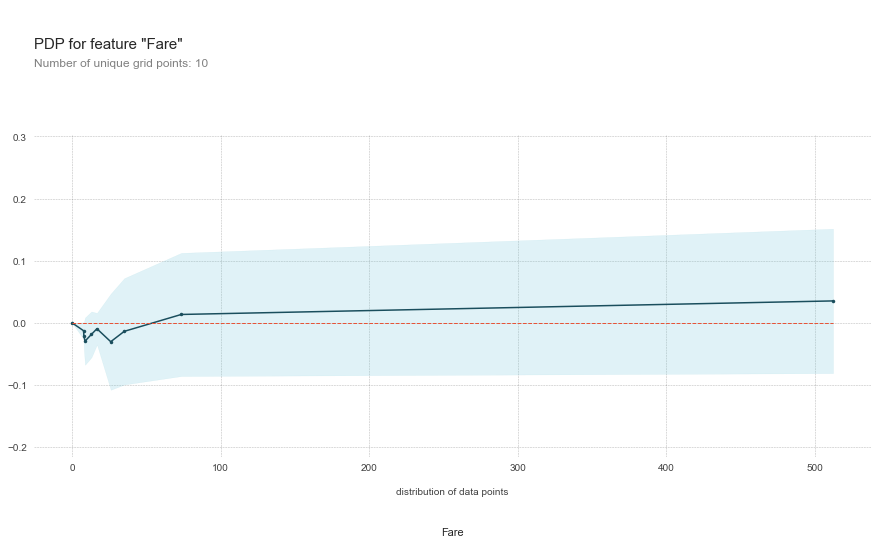

In [94]:
from pdpbox import pdp, get_dataset

test_titanic = get_dataset.titanic()
titanic_data = test_titanic['data']
titanic_target = test_titanic['target']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
pdp_fare = pdp.pdp_isolate(model=titanic_model,
                           dataset=titanic_data,
                           model_features=titanic_features,
                           feature='Fare')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_fare,
                         feature_name='Fare',
                         plot_pts_dist=True)

## Indivduals pipeline

In [15]:
## Linear regression pipeline ('pca1' , PCA(n_components=5) ) ,
pipeline_LR = Pipeline([ ( 'preprocess1', StandardScaler()) ,  ('LR_regression' , linear_model.LinearRegression() ) ])
pipeline_LR

Pipeline(steps=[('preprocess1', StandardScaler()),
                ('LR_regression', LinearRegression())])

In [16]:
## KNN regression pipeline ('pca2' , PCA(n_components=5) ) ,
pipeline_KNN = Pipeline([ ( 'preprocess2', StandardScaler()) , ('knn_regressor' , KNeighborsRegressor(n_neighbors=2) ) ])
pipeline_KNN

Pipeline(steps=[('preprocess2', StandardScaler()),
                ('knn_regressor', KNeighborsRegressor(n_neighbors=2))])

In [17]:
## SVM regression pipeline ('pca3' , PCA(n_components=5) ),
pipeline_svm = Pipeline([ ( 'preprocess3', StandardScaler()) ,  ('svm_regressor' , svm.SVR() ) ])
pipeline_svm

Pipeline(steps=[('preprocess3', StandardScaler()), ('svm_regressor', SVR())])

In [18]:
#xgboost pipeline ('pca4' , PCA(n_components=5) ),
pipeline_xg = Pipeline([ ( 'preprocess4', StandardScaler()) ,  ('xgboost_regressor' , XGBRegressor() ) ])
pipeline_xg


Pipeline(steps=[('preprocess4', StandardScaler()),
                ('xgboost_regressor',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [19]:
## random forest regression  ('pca5' , PCA(n_components=5) ),
pipeline_rf = Pipeline([ ( 'preprocess5', StandardScaler()) , ('rf_regressor' , RandomForestRegressor(max_depth=2, random_state=0) ) ])
pipeline_rf

Pipeline(steps=[('preprocess5', StandardScaler()),
                ('rf_regressor',
                 RandomForestRegressor(max_depth=2, random_state=0))])

In [20]:
## ridge regression ('pca6' , PCA(n_components=5) ),
pipeline_ridge = Pipeline([ ( 'preprocess6', StandardScaler()) ,  ('ridge_regressor' ,Ridge(alpha=1.0) ) ])
pipeline_ridge

Pipeline(steps=[('preprocess6', StandardScaler()),
                ('ridge_regressor', Ridge())])

In [21]:
## lasso regression , ('pca7' , PCA(n_components=5) )
pipeline_lasso = Pipeline([ ( 'preprocess7', StandardScaler()) , ('lasso_regressor' ,Lasso(alpha=0.1) ) ])
pipeline_lasso

Pipeline(steps=[('preprocess7', StandardScaler()),
                ('lasso_regressor', Lasso(alpha=0.1))])

In [22]:
## elasticnet regression : ('pca8' , PCA(n_components=5) ),
pipeline_elastic = Pipeline([ ( 'preprocess8', StandardScaler()) ,  ('elastic_regressor' ,ElasticNet(random_state=0) ) ])
pipeline_elastic

Pipeline(steps=[('preprocess8', StandardScaler()),
                ('elastic_regressor', ElasticNet(random_state=0))])

## non-embeddings data & no one-hot encoding

In [23]:
df = pd.read_csv('Modelling_data.csv')
df.head(4)

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_1,...,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category,Pros1,Cons1
0,McFarlane'S Reserve Kentucky Straight Bourbon ...,36.99,3.8,146,9,18,17,47,55,First Call Kentucky Straight Bourbon 1.75L,...,0.123288,0.116438,0.321918,0.376712,58.0,NaN,3-4 star,Medium price,price,NaN
1,Jim Beam Bourbon Whiskey 1.75l,18.99,4.6,471,7,7,24,72,361,Tower Vodka 1.75L,...,0.014862,0.050955,0.152866,0.766454,105.0,NaN,4-5 star,Low price,satisfaction,NaN
2,Skatterbrain Peanut Butter Whiskey 750ml,15.99,4.4,436,22,20,21,73,300,Skatterbrain Dark Chocolate Banana Whiskey 750ml,...,0.045872,0.048165,0.167431,0.688073,129.0,NaN,4-5 star,Low price,satisfaction,NaN
3,Johnnie Walker Blue Label 750ml,194.90,4.7,772,11,9,36,101,615,Chivas Royal Salute 21 Yr 750ml,...,0.011658,0.046632,0.130829,0.796632,2.0,NaN,4-5 star,High price,satisfaction,NaN


In [24]:
len(df)

1694

In [25]:
df.columns

Index(['Product name', 'Price_per_unit', 'Rating', 'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count',
       '5 star count', 'Similar_product_1',
       ...
       '2star_percent', '3star_percent', '4star_percent', '5star_percent',
       'pros_count', 'cons_count', 'rating_bin', 'Price_category', 'Pros1',
       'Cons1'],
      dtype='object', length=556)

### data for model

In [26]:
X = df[['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ]]
y = df['recommendation_percent']

In [27]:
df.head()

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_1,...,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category,Pros1,Cons1
0,McFarlane'S Reserve Kentucky Straight Bourbon ...,36.99,3.8,146,9,18,17,47,55,First Call Kentucky Straight Bourbon 1.75L,...,0.123288,0.116438,0.321918,0.376712,58.0,NaN,3-4 star,Medium price,price,NaN
1,Jim Beam Bourbon Whiskey 1.75l,18.99,4.6,471,7,7,24,72,361,Tower Vodka 1.75L,...,0.014862,0.050955,0.152866,0.766454,105.0,NaN,4-5 star,Low price,satisfaction,NaN
2,Skatterbrain Peanut Butter Whiskey 750ml,15.99,4.4,436,22,20,21,73,300,Skatterbrain Dark Chocolate Banana Whiskey 750ml,...,0.045872,0.048165,0.167431,0.688073,129.0,NaN,4-5 star,Low price,satisfaction,NaN
3,Johnnie Walker Blue Label 750ml,194.90,4.7,772,11,9,36,101,615,Chivas Royal Salute 21 Yr 750ml,...,0.011658,0.046632,0.130829,0.796632,2.0,NaN,4-5 star,High price,satisfaction,NaN
4,Bulleit Bourbon 1.75l,35.99,4.6,1297,7,14,53,281,942,Redemption Wheated Bourbon 750ml,...,0.010794,0.040864,0.216654,0.726291,100.0,NaN,4-5 star,Medium price,price,NaN


In [28]:
## drop nan
X = X.fillna(0)
y = y.fillna(0)

In [29]:
## spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_ratio,random_state=0)
X_train.head()

,Price_per_unit,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Review_sentiment,Review_title_sentiment,Negative_sentiment_count,Positive_sentiment_count,pros_count,cons_count
752,12.99,52,2,0,3,5,42,0.284958,0.471815,0.0,20.0,13.0,0.0
581,43.99,1,0,0,1,0,0,0.393333,0.393333,0.0,1.0,0.0,0.0
1647,53.99,33,0,0,1,4,28,0.000000,0.000000,0.0,0.0,8.0,0.0
644,149.90,2,0,0,0,0,2,0.368056,0.285227,0.0,2.0,0.0,0.0
575,99.99,3,0,0,0,0,3,0.284716,0.284716,0.0,3.0,0.0,0.0


In [30]:
X.dtypes

Price_per_unit              float64
Rating_count                  int64
1 star count                  int64
2 star count                  int64
3 star count                  int64
4 star count                  int64
5 star count                  int64
Review_sentiment            float64
Review_title_sentiment      float64
Negative_sentiment_count    float64
Positive_sentiment_count    float64
pros_count                  float64
cons_count                  float64
dtype: object

In [31]:
cols_df = pd.DataFrame(['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ] )
cols_df.to_csv('cols1.csv',index=False)
cols_df.head()

,0
0,Price_per_unit
1,Rating_count
2,1 star count
3,2 star count
4,3 star count


In [32]:
df_describe = X.describe().transpose()
df_describe.to_csv('df_describe.csv' , index=True)
df_describe

,count,mean,std,min,25%,50%,75%,max
Price_per_unit,1694.0,70.797397,297.632966,0.790,19.490000,34.990000,59.990000,5999.9
Rating_count,1694.0,139.261511,558.757979,1.000,6.000000,21.000000,70.000000,7302.0
1 star count,1694.0,3.351240,8.376056,0.000,0.000000,1.000000,3.000000,87.0
2 star count,1694.0,2.799292,8.463596,0.000,0.000000,1.000000,2.000000,107.0
3 star count,1694.0,8.064935,35.484569,0.000,0.000000,1.000000,4.000000,488.0
4 star count,1694.0,25.091499,100.485869,0.000,1.000000,3.000000,13.000000,1349.0
5 star count,1694.0,99.954545,412.089781,0.000,4.000000,13.000000,45.000000,5290.0
Review_sentiment,1694.0,0.295989,0.167817,-0.375,0.221915,0.324377,0.396102,1.0
Review_title_sentiment,1694.0,0.388011,0.225272,-0.700,0.299009,0.433322,0.514802,1.0
Negative_sentiment_count,1694.0,2.735537,5.758043,0.000,0.000000,1.000000,3.000000,87.0


### Deciding Which regressor pipeline is best

In [33]:
pipelines = [pipeline_LR , pipeline_KNN ,   pipeline_svm , pipeline_xg , pipeline_rf , pipeline_ridge , pipeline_lasso , pipeline_elastic ]
models_list = ['Linear Regression' , 'KNN regression' , 'SVM regression' , 'XGboost regression' , 
               'Random forest regression' , 'Ridge regression' , 'Lasso regression' , 'Elasticnet regression']

In [34]:
best_accuracy = 0.0
best_pipeline = ""

In [35]:
for pipe in pipelines:
  pipe.fit(X_train , y_train)

In [36]:
for i , model in enumerate(pipelines):
  #y_pred = model.predict(X_test)
  #acc = r2_score(y_test , y_pred)
  acc = model.score(X_test,y_test)
  name = models_list[i]
  train_r2 = model.score(X_train , y_train)
  train_adj_r2 = ( ( 1-train_r2 ) * ( len(y_train) - 1 )) / ( len(y_train) - X_train.shape[1] - 1 )
  train_adj_r2 = 1 - train_adj_r2
  print(name , " Accuracy :" , acc , '| train_score : ' ,train_r2 , '| adjusted R2: ', train_adj_r2   )
  best_accuracy = max(best_accuracy , acc)
  if best_accuracy == acc :
    best_pipeline = name
print(len(y_train) , X_train.shape[1] , X_train.shape)

Linear Regression  Accuracy : 0.11209121753589835 | train_score :  0.17205820919119807 | adjusted R2:  0.16286671194054525
KNN regression  Accuracy : 0.3507719951538337 | train_score :  0.8374158759022314 | adjusted R2:  0.8356109283247156
SVM regression  Accuracy : -0.0038052293450636654 | train_score :  0.011066247343225588 | adjusted R2:  8.747809938425277e-05
XGboost regression  Accuracy : 0.9533527613233727 | train_score :  0.9998936434961284 | adjusted R2:  0.9998924627663672
Random forest regression  Accuracy : 0.9248394746428698 | train_score :  0.9360102532256667 | adjusted R2:  0.9352998632102385
Ridge regression  Accuracy : 0.11159082230800021 | train_score :  0.17188908435897288 | adjusted R2:  0.16269570954826973
Lasso regression  Accuracy : 0.10571436417172775 | train_score :  0.1682387728512853 | adjusted R2:  0.15900487366005278
Elasticnet regression  Accuracy : 0.10484940260176256 | train_score :  0.145979740062802 | adjusted R2:  0.13649872949133868
1185 13 (1185, 13)

In [37]:
## Best classifier and accuracy
print(best_pipeline , " is best classifier with accuracy = " , best_accuracy)

XGboost regression  is best classifier with accuracy =  0.9533527613233727


In [38]:
## other metrics
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test , y_pred) ## r2 score is same as model.score()
  adj_r2 =  ( ( 1-r2 ) * ( len(y_test) - 1 )) / ( len(y_test) - X_test.shape[1] - 1 )
  adj_r2 = 1 - adj_r2
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test , y_pred)
  name = models_list[i]
  print(name , "-> R2 :" , round(r2,3) , "|adjusted R2 :" , round(adj_r2,3) ,"|MAE :" , round(mae,3), "|RMSE :" , round(rmse,3)  )

print(len(y_test) , X_test.shape[1] , X_test.shape)

Linear Regression -> R2 : 0.112 |adjusted R2 : 0.089 |MAE : 33.526 |RMSE : 37.217
KNN regression -> R2 : 0.351 |adjusted R2 : 0.334 |MAE : 18.016 |RMSE : 31.824
SVM regression -> R2 : -0.004 |adjusted R2 : -0.03 |MAE : 28.058 |RMSE : 39.571
XGboost regression -> R2 : 0.953 |adjusted R2 : 0.952 |MAE : 4.793 |RMSE : 8.53
Random forest regression -> R2 : 0.925 |adjusted R2 : 0.923 |MAE : 6.87 |RMSE : 10.828
Ridge regression -> R2 : 0.112 |adjusted R2 : 0.088 |MAE : 33.538 |RMSE : 37.227
Lasso regression -> R2 : 0.106 |adjusted R2 : 0.082 |MAE : 33.613 |RMSE : 37.35
Elasticnet regression -> R2 : 0.105 |adjusted R2 : 0.081 |MAE : 33.466 |RMSE : 37.368
509 13 (509, 13)


In [39]:
## other metrics
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test , y_pred) ## r2 score is same as model.score()
  adj_r2 =  ( ( 1-r2 ) * ( len(y_test) - 1 )) / ( len(y_test) - X_test.shape[1] - 1 )
  adj_r2 = 1 - adj_r2
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test , y_pred)
  name = models_list[i]
  print(name , "-> R2 :" , round(r2,3) , "|adjusted R2 :" , round(adj_r2,3) , "|RMSE :" , round(rmse,3) , "|MAE :" , round(mae,3))

Linear Regression -> R2 : 0.112 |adjusted R2 : 0.089 |RMSE : 37.217 |MAE : 33.526
KNN regression -> R2 : 0.351 |adjusted R2 : 0.334 |RMSE : 31.824 |MAE : 18.016
SVM regression -> R2 : -0.004 |adjusted R2 : -0.03 |RMSE : 39.571 |MAE : 28.058
XGboost regression -> R2 : 0.953 |adjusted R2 : 0.952 |RMSE : 8.53 |MAE : 4.793
Random forest regression -> R2 : 0.925 |adjusted R2 : 0.923 |RMSE : 10.828 |MAE : 6.87
Ridge regression -> R2 : 0.112 |adjusted R2 : 0.088 |RMSE : 37.227 |MAE : 33.538
Lasso regression -> R2 : 0.106 |adjusted R2 : 0.082 |RMSE : 37.35 |MAE : 33.613
Elasticnet regression -> R2 : 0.105 |adjusted R2 : 0.081 |RMSE : 37.368 |MAE : 33.466


In [40]:
y_pred = pipeline_lasso.predict(X_test)

In [41]:
y_pred = pd.DataFrame(y_pred , columns = ['recommendation_prediction'])
y_pred

,recommendation_prediction
0,55.927746
1,66.605329
2,56.056490
3,63.284095
4,50.686678
...,...
504,53.176069
505,64.306656
506,59.850361
507,52.163317


In [42]:
y_pred.describe()

,recommendation_prediction
count,509.000000
mean,59.130088
std,17.006010
min,-24.550299
25%,50.722090
50%,55.034578
75%,61.674511
max,149.934655


In [43]:
'''X_test['rating'] = (1*X_test['1 star count'] + 2*X_test['2 star count']+
                    3*X_test['3 star count'] + 4*X_test['4 star count']
                    + 5*X_test['5 star count'])''';
X_test['rating'] = 0
for index,row in X_test.iterrows():
  X_test.loc[index,'rating'] = df.loc[index,'Rating']
X_test['rating']

249     4.8
6       4.8
124     5.0
34      4.2
536     4.3
       ... 
47      4.9
1253    4.1
568     5.0
1506    4.5
220     3.1
Name: rating, Length: 509, dtype: float64

In [44]:
X_test.head()

,Price_per_unit,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Review_sentiment,Review_title_sentiment,Negative_sentiment_count,Positive_sentiment_count,pros_count,cons_count,rating
249,89.99,20,0,0,1,3,16,0.472843,0.490179,0.0,8.0,4.0,0.0,4.8
6,28.99,695,10,4,22,63,596,0.461066,0.456366,5.0,92.0,20.0,0.0,4.8
124,51.99,4,0,0,0,0,4,0.450443,0.594402,0.0,4.0,3.0,0.0,5.0
34,0.79,58,3,2,4,22,27,0.335564,0.405348,5.0,45.0,26.0,0.0,4.2
536,44.99,4,0,1,0,0,3,0.294045,0.317973,0.0,4.0,0.0,0.0,4.3


In [45]:
'''y_out = pd.concat( [ X_test[['Price_per_unit','Rating_count']] ,y_test , 
                    y_pred['recommendation_prediction']] ,axis=1) #[df , df_onehot] , axis=1
y_out''';
y_out =  pd.concat( [ X_test[['Price_per_unit','rating' , 'Rating_count']] ,y_test] ,axis=1)
y_out 

,Price_per_unit,rating,Rating_count,recommendation_percent
249,89.99,4.8,20,100.0
6,28.99,4.8,695,90.0
124,51.99,5.0,4,100.0
34,0.79,4.2,58,86.0
536,44.99,4.3,4,0.0
...,...,...,...,...
47,12.99,4.9,8,100.0
1253,19.99,4.1,31,96.0
568,109.90,5.0,3,0.0
1506,39.99,4.5,15,90.0


In [46]:
y_out.to_csv('test_data.csv',index=False)

In [47]:
y_pred

,recommendation_prediction
0,55.927746
1,66.605329
2,56.056490
3,63.284095
4,50.686678
...,...
504,53.176069
505,64.306656
506,59.850361
507,52.163317


In [48]:
y_pred.to_csv('prediction.csv',index=False)

In [49]:
y_pred.describe()

,recommendation_prediction
count,509.000000
mean,59.130088
std,17.006010
min,-24.550299
25%,50.722090
50%,55.034578
75%,61.674511
max,149.934655


### null data recommednation

In [50]:
df_recomm_null = df[df['recommendation_percent'].isna()]
df_recomm_null.head()

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_1,...,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category,Pros1,Cons1
49,Glenlivet Illicit Still 12 Year Single Malt Sc...,42.99,4.8,5,0,0,0,1,4,"Amici Cabernet Sauvignon Napa, 2018 750ml",...,0.000000,0.000000,0.200000,0.80,NaN,NaN,4-5 star,Medium price,NaN,NaN
64,Bird Dog Strawberry Whiskey 750ml,17.99,4.8,4,0,0,0,1,3,Skatterbrain Dark Cherry Vanilla Whiskey 750ml,...,0.000000,0.000000,0.250000,0.75,NaN,NaN,4-5 star,Low price,NaN,NaN
65,Templeton Rye Whiskey 6 Year 750ml,39.99,4.6,15,0,1,1,1,12,NaN,...,0.066667,0.066667,0.066667,0.80,NaN,NaN,4-5 star,Medium price,NaN,NaN
73,Glyph 85H Whiskey 750ml,29.99,5.0,3,0,0,0,0,3,NaN,...,0.000000,0.000000,0.000000,1.00,NaN,NaN,4-5 star,Medium price,NaN,NaN
75,Bird Dog Peanut Butter Flavored Whiskey 750ml,17.99,5.0,2,0,0,0,0,2,NaN,...,0.000000,0.000000,0.000000,1.00,NaN,NaN,4-5 star,Low price,NaN,NaN


In [51]:
df_recomm_null.to_csv('df_recom_null.csv',index=False)

In [52]:
cols_x = ['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ] 
X_null = df_recomm_null[cols_x]

In [53]:
X_null = X_null.fillna(0)

In [54]:
best_mean = -1e06
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_null)
  name = models_list[i]
  mean = np.mean(y_pred)
  print(name , "mean :" , np.mean(y_pred) , '|min : ' , min(y_pred) , "|max : " , max(y_pred)  )
  best_mean = max(best_mean , mean)
  if best_mean == mean:
    best_pipeline = pipelines[i]

Linear Regression mean : 49.598614513047316 |min :  -15.511192073078462 |max :  67.28953361009388
KNN regression mean : 12.82703777335984 |min :  0.0 |max :  100.0
SVM regression mean : 69.19292015611288 |min :  54.555578001241365 |max :  87.09065092643023
XGboost regression mean : 0.025474856 |min :  -4.255329 |max :  4.532491
Random forest regression mean : 0.30049323651533283 |min :  0.0 |max :  79.39433411922711
Ridge regression mean : 49.669894973218256 |min :  -15.399598338132748 |max :  67.3080043061809
Lasso regression mean : 49.97354750902935 |min :  -13.631329589404075 |max :  67.3362248259817
Elasticnet regression mean : 52.490389430765674 |min :  9.290542397855774 |max :  66.40541941081791


In [55]:
print(best_pipeline)
y_pred = best_pipeline.predict(X_null) 

Pipeline(steps=[('preprocess3', StandardScaler()), ('svm_regressor', SVR())])


In [56]:
y_pred = pd.DataFrame(y_pred , columns = ['recommendation_prediction'])
y_pred

,recommendation_prediction
0,68.832840
1,76.860063
2,76.810391
3,75.354496
4,72.396251
...,...
498,55.860598
499,60.474038
500,55.745324
501,55.810182


In [57]:
y_pred.describe()

,recommendation_prediction
count,503.000000
mean,69.192920
std,8.801466
min,54.555578
25%,60.529672
50%,71.723038
75%,76.672597
max,87.090651


In [58]:
y_pred.to_csv('recom_prediction.csv',index=False)

## with embeddings & with one hot encoding

In [62]:
df = pd.read_csv('Modelling_data (1).csv') 
#df = pd.read_csv('Modelling_data (2).csv') 
df.head()

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Pros,...,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category,Pros1,Cons1
0,McFarlane'S Reserve Kentucky Straight Bourbon ...,36.99,3.8,146,9,18,17,47,55,"{'price': '29 reviews', 'value': '16 reviews',...",...,0.123288,0.116438,0.321918,0.376712,58.0,NaN,3-4 star,Medium price,price,NaN
1,Jim Beam Bourbon Whiskey 1.75l,18.99,4.6,471,7,7,24,72,361,"{'satisfaction': '48 reviews', 'price': '42 re...",...,0.014862,0.050955,0.152866,0.766454,105.0,NaN,4-5 star,Low price,satisfaction,NaN
2,Skatterbrain Peanut Butter Whiskey 750ml,15.99,4.4,436,22,20,21,73,300,"{'satisfaction': '93 reviews', 'price': '27 re...",...,0.045872,0.048165,0.167431,0.688073,129.0,NaN,4-5 star,Low price,satisfaction,NaN
3,Johnnie Walker Blue Label 750ml,194.90,4.7,772,11,9,36,101,615,{'satisfaction': '2 reviews'},...,0.011658,0.046632,0.130829,0.796632,2.0,NaN,4-5 star,High price,satisfaction,NaN
4,Bulleit Bourbon 1.75l,35.99,4.6,1297,7,14,53,281,942,"{'price': '48 reviews', 'satisfaction': '35 re...",...,0.010794,0.040864,0.216654,0.726291,100.0,NaN,4-5 star,Medium price,price,NaN


### one hot encoding

In [63]:
pros_onehot =  pd.get_dummies(df.Pros1, prefix='pros_')
print(pros_onehot.head())

   pros__For drinks  pros__appearance  pros__blending  pros__cleaning  \
0                 0                 0               0               0   
1                 0                 0               0               0   
2                 0                 0               0               0   
3                 0                 0               0               0   
4                 0                 0               0               0   

   pros__comfort  pros__convenient  pros__copper  pros__delicious  \
0              0                 0             0                0   
1              0                 0             0                0   
2              0                 0             0                0   
3              0                 0             0                0   
4              0                 0             0                0   

   pros__disappointing  pros__drinking  ...  pros__satisfaction  pros__small  \
0                    0               0  ...                   0   

In [64]:
cons_onehot =  pd.get_dummies(df.Cons1, prefix='cons_')
print(cons_onehot.head())

   cons__disappointing  cons__flavor  cons__mixing  cons__price  cons__smell  \
0                    0             0             0            0            0   
1                    0             0             0            0            0   
2                    0             0             0            0            0   
3                    0             0             0            0            0   
4                    0             0             0            0            0   

   cons__taste  cons__thickness  cons__weight  
0            0                0             0  
1            0                0             0  
2            0                0             0  
3            0                0             0  
4            0                0             0  


In [65]:
## append these columns to df
df_onehot = pd.concat([pros_onehot, cons_onehot], axis=1)
df_onehot.head()

,pros__For drinks,pros__appearance,pros__blending,pros__cleaning,pros__comfort,pros__convenient,pros__copper,pros__delicious,pros__disappointing,pros__drinking,...,pros__value,pros__wood,cons__disappointing,cons__flavor,cons__mixing,cons__price,cons__smell,cons__taste,cons__thickness,cons__weight
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
onehot_cols = list(df_onehot.columns)
onehot_cols

['pros__For drinks',
 'pros__appearance',
 'pros__blending',
 'pros__cleaning',
 'pros__comfort',
 'pros__convenient',
 'pros__copper',
 'pros__delicious',
 'pros__disappointing',
 'pros__drinking',
 'pros__drinks',
 'pros__enjoyment',
 'pros__flavor',
 'pros__flavors',
 'pros__for bottles',
 'pros__for coffee',
 'pros__for school use',
 'pros__glass',
 'pros__large',
 'pros__lighting',
 'pros__mixing',
 'pros__packaging',
 'pros__preparation',
 'pros__price',
 'pros__quality',
 'pros__red',
 'pros__satisfaction',
 'pros__small',
 'pros__smell',
 'pros__smooth',
 'pros__smoothness',
 'pros__stability',
 'pros__sweet',
 'pros__taste',
 'pros__value',
 'pros__wood',
 'cons__disappointing',
 'cons__flavor',
 'cons__mixing',
 'cons__price',
 'cons__smell',
 'cons__taste',
 'cons__thickness',
 'cons__weight']

In [67]:
df = pd.concat([df , df_onehot] , axis=1)
df.head()

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Pros,...,pros__value,pros__wood,cons__disappointing,cons__flavor,cons__mixing,cons__price,cons__smell,cons__taste,cons__thickness,cons__weight
0,McFarlane'S Reserve Kentucky Straight Bourbon ...,36.99,3.8,146,9,18,17,47,55,"{'price': '29 reviews', 'value': '16 reviews',...",...,0,0,0,0,0,0,0,0,0,0
1,Jim Beam Bourbon Whiskey 1.75l,18.99,4.6,471,7,7,24,72,361,"{'satisfaction': '48 reviews', 'price': '42 re...",...,0,0,0,0,0,0,0,0,0,0
2,Skatterbrain Peanut Butter Whiskey 750ml,15.99,4.4,436,22,20,21,73,300,"{'satisfaction': '93 reviews', 'price': '27 re...",...,0,0,0,0,0,0,0,0,0,0
3,Johnnie Walker Blue Label 750ml,194.90,4.7,772,11,9,36,101,615,{'satisfaction': '2 reviews'},...,0,0,0,0,0,0,0,0,0,0
4,Bulleit Bourbon 1.75l,35.99,4.6,1297,7,14,53,281,942,"{'price': '48 reviews', 'satisfaction': '35 re...",...,0,0,0,0,0,0,0,0,0,0


### splitting train test data

In [68]:
cols_x = ['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ] + [str(i) for i in range(0,512)] + onehot_cols
print(cols_x)
X = df[cols_x]
y = df['recommendation_percent']

['Price_per_unit', 'Rating_count', '1 star count', '2 star count', '3 star count', '4 star count', '5 star count', 'Review_sentiment', 'Review_title_sentiment', 'Negative_sentiment_count', 'Positive_sentiment_count', 'pros_count', 'cons_count', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123

In [69]:
## nans
X = X.fillna(0)
y = y.fillna(0)

In [70]:
## spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_ratio,random_state=0)
X_train.head()

,Price_per_unit,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Review_sentiment,Review_title_sentiment,Negative_sentiment_count,...,pros__value,pros__wood,cons__disappointing,cons__flavor,cons__mixing,cons__price,cons__smell,cons__taste,cons__thickness,cons__weight
752,12.99,52,2,0,3,5,42,0.284958,0.471815,0.0,...,0,0,0,0,0,0,0,0,0,0
581,43.99,1,0,0,1,0,0,0.393333,0.393333,0.0,...,0,0,0,0,0,0,0,0,0,0
1647,53.99,33,0,0,1,4,28,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
644,149.90,2,0,0,0,0,2,0.368056,0.285227,0.0,...,0,0,0,0,0,0,0,0,0,0
575,99.99,3,0,0,0,0,3,0.284716,0.284716,0.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
cols_df = pd.DataFrame(['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ]  + onehot_cols)
cols_df.to_csv('cols1.csv',index=False)
cols_df.head()

,0
0,Price_per_unit
1,Rating_count
2,1 star count
3,2 star count
4,3 star count


In [72]:
df_describe = X.describe()#.transpose()
df_describe['1']

count    1694.000000
mean       -0.037393
std         0.027122
min        -0.091196
25%        -0.055181
50%        -0.049068
75%        -0.019263
max         0.066044
Name: 1, dtype: float64

### Deciding Which regressor pipeline is best

In [73]:
pipelines = [pipeline_LR , pipeline_KNN ,   pipeline_svm , pipeline_xg , pipeline_rf , pipeline_ridge , pipeline_lasso , pipeline_elastic ]
models_list = ['Linear Regression' , 'KNN regression' , 'SVM regression' , 'XGboost regression' , 
               'Random forest regression' , 'Ridge regression' , 'Lasso regression' , 'Elasticnet regression']

In [74]:
best_accuracy = 0.0
best_pipeline = ""

In [75]:
for pipe in pipelines:
  pipe.fit(X_train , y_train)

In [76]:
for i , model in enumerate(pipelines):
  #y_pred = model.predict(X_test)
  #acc = r2_score(y_test , y_pred)
  acc = model.score(X_test,y_test)
  name = models_list[i]
  train_r2 = model.score(X_train , y_train)
  train_adj_r2 = ( ( 1-train_r2 ) * ( len(y_train) - 1 )) / ( len(y_train) - X_train.shape[1] - 1 )
  train_adj_r2 = 1 - train_adj_r2
  print(name , " Accuracy :" , acc , '| train_score : ' ,train_r2 , '| adjusted R2: ', train_adj_r2   )
  best_accuracy = max(best_accuracy , acc)
  if best_accuracy == acc :
    best_pipeline = name
print(len(y_train) , X_train.shape[1] , X_train.shape)

Linear Regression  Accuracy : 0.7253152597786439 | train_score :  0.9809200261410674 | adjusted R2:  0.9632671722780876
KNN regression  Accuracy : 0.26126700433053396 | train_score :  0.8143325001600863 | adjusted R2:  0.6425523255114507
SVM regression  Accuracy : 0.12412013702665459 | train_score :  0.13453861624968877 | adjusted R2:  -0.6661890705046642
XGboost regression  Accuracy : 0.9502868048239762 | train_score :  0.9999885712371165 | adjusted R2:  0.99997799730853
Random forest regression  Accuracy : 0.9252035969904479 | train_score :  0.9432763461983036 | adjusted R2:  0.8907954372338073
Ridge regression  Accuracy : 0.7480146631546014 | train_score :  0.98076747128736 | adjusted R2:  0.9629734731776166
Lasso regression  Accuracy : 0.8300259681101855 | train_score :  0.9657468647157044 | adjusted R2:  0.9340557525583641
Elasticnet regression  Accuracy : 0.6376791620590849 | train_score :  0.7261648248150032 | adjusted R2:  0.47281163021294925
1185 569 (1185, 569)


In [77]:
## Best classifier and accuracy
print(best_pipeline , " is best classifier with accuracy = " , best_accuracy)

XGboost regression  is best classifier with accuracy =  0.9502868048239762


In [78]:
## other metrics
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test , y_pred) ## r2 score is same as model.score()
  adj_r2 =  ( ( 1-r2 ) * ( len(y_train) - 1 )) / abs( len(y_train) - X_train.shape[1] - 1 )
  adj_r2 = 1 - adj_r2
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test , y_pred)
  name = models_list[i]
  print(name , "-> R2 :" , round(r2,3) , "|adjusted R2 :" , round(adj_r2,3) ,"|MAE :" , round(mae,3), "|RMSE :" , round(rmse,3)  )

print(len(y_test) , X_test.shape[1] , X_test.shape)

Linear Regression -> R2 : 0.725 |adjusted R2 : 0.471 |MAE : 12.678 |RMSE : 20.7
KNN regression -> R2 : 0.261 |adjusted R2 : -0.422 |MAE : 19.917 |RMSE : 33.947
SVM regression -> R2 : 0.124 |adjusted R2 : -0.686 |MAE : 26.987 |RMSE : 36.964
XGboost regression -> R2 : 0.95 |adjusted R2 : 0.904 |MAE : 4.842 |RMSE : 8.806
Random forest regression -> R2 : 0.925 |adjusted R2 : 0.856 |MAE : 6.729 |RMSE : 10.802
Ridge regression -> R2 : 0.748 |adjusted R2 : 0.515 |MAE : 12.145 |RMSE : 19.826
Lasso regression -> R2 : 0.83 |adjusted R2 : 0.673 |MAE : 9.012 |RMSE : 16.284
Elasticnet regression -> R2 : 0.638 |adjusted R2 : 0.302 |MAE : 18.178 |RMSE : 23.774
509 569 (509, 569)


In [79]:
## other metrics
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test , y_pred) ## r2 score is same as model.score()
  adj_r2 =  ( ( 1-r2 ) * ( len(y_test) - 1 )) / ( len(y_test) - X_test.shape[1] - 1 )
  adj_r2 = 1 - adj_r2
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test , y_pred)
  name = models_list[i]
  print(name , "-> R2 :" , round(r2,3) , "|adjusted R2 :" , round(adj_r2,3) , "|RMSE :" , round(rmse,3) , "|MAE :" , round(mae,3))

Linear Regression -> R2 : 0.725 |adjusted R2 : 3.288 |RMSE : 20.7 |MAE : 12.678
KNN regression -> R2 : 0.261 |adjusted R2 : 7.152 |RMSE : 33.947 |MAE : 19.917
SVM regression -> R2 : 0.124 |adjusted R2 : 8.294 |RMSE : 36.964 |MAE : 26.987
XGboost regression -> R2 : 0.95 |adjusted R2 : 1.414 |RMSE : 8.806 |MAE : 4.842
Random forest regression -> R2 : 0.925 |adjusted R2 : 1.623 |RMSE : 10.802 |MAE : 6.729
Ridge regression -> R2 : 0.748 |adjusted R2 : 3.099 |RMSE : 19.826 |MAE : 12.145
Lasso regression -> R2 : 0.83 |adjusted R2 : 2.416 |RMSE : 16.284 |MAE : 9.012
Elasticnet regression -> R2 : 0.638 |adjusted R2 : 4.017 |RMSE : 23.774 |MAE : 18.178


### test prediction

In [80]:
def test_pred(pipeline,file_name) :
  y_pred = None
  #print(X_test)
  X_test1 = X_test.copy(deep=True)
  y_pred = pipeline.predict(X_test1)
  y_pred = pd.DataFrame(y_pred , columns = ['recommendation_prediction'])
  #print(y_pred.shape)
  X_test1['rating'] = 0
  for index,row in X_test1.iterrows():
    X_test1.loc[index,'rating'] = df.loc[index,'Rating']
  X_test1['rating']
  #print(X_test1.shape)
  y_out = None
  y_out =  pd.concat( [ X_test1[['Price_per_unit','rating' , 'Rating_count']] ,y_test] ,axis=1)
  #print('y_out :' , y_out.shape)
  #print(y_out)
  y_out1 = y_out.copy(deep=True)
  y_out1 = y_out1.reset_index(drop=True)
  #print(y_pred)
  y_out1 = pd.concat( [y_out1 ,y_pred] ,axis=1)
  #print(y_out1)
  y_out1 = y_out1[y_out1['recommendation_percent']>0]
  y_out1['predict_p20'] = y_out1['recommendation_prediction']+20
  y_out1['predict_m20'] = y_out1['recommendation_prediction']-20
  #print(y_out1)
  y_pred.to_csv('prediction' + file_name + '.csv',index=False)
  y_out1.to_csv('test_data' + file_name + '.csv',index=False)
  print('-----',file_name , '-------')
  print(y_out1[['recommendation_percent','recommendation_prediction','predict_p20','predict_m20']].describe())

  ## resiudal plot
  residuals = y_out1['recommendation_percent'] - y_out1['recommendation_prediction']
  #plt.scatter(residuals,y_out1['recommendation_prediction'])
  #sns.scatterplot(x = y_out1['recommendation_prediction'] , y=residuals)
  plt.figure(figsize=(8,6))
  sns.residplot(x = y_out1['recommendation_prediction'] , y=residuals)
  plt.ylabel('residuals')
  plt.xlabel('predicted recommendation score')
  plt.title('Residual plot - ' +  file_name + ' regressor Model')
  plt.grid(True)
  
  ## qq plot
  plt.figure(figsize=(8,6))
  fig = sm.qqplot(residuals , stats.norm , fit =True , line='s')
  plt.title('Q-Q plot of resiudals : ' +  file_name + ' model'  )
  fig.show()

  ## histogram
  plt.figure(figsize=(8,6))
  sns.histplot(residuals , kde=True)
  plt.title('histogram of resiudals : ' +  file_name + ' model'  )
  

----- Xgboost -------
       recommendation_percent  recommendation_prediction  predict_p20  \
count              368.000000                 368.000000   368.000000   
mean                84.361413                  84.408333   104.408363   
std                 13.664023                   9.717018     9.717017   
min                 25.000000                  40.900795    60.900795   
25%                 78.000000                  79.392401    99.392401   
50%                 87.000000                  86.369427   106.369427   
75%                 93.250000                  91.314728   111.314728   
max                100.000000                 103.158638   123.158638   

       predict_m20  
count   368.000000  
mean     64.408318  
std       9.717020  
min      20.900795  
25%      59.392401  
50%      66.369427  
75%      71.314728  
max      83.158638  


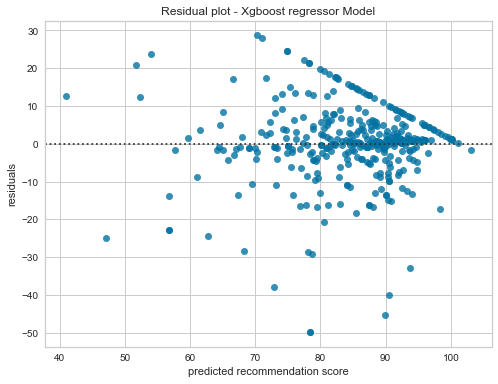

<Figure size 576x432 with 0 Axes>

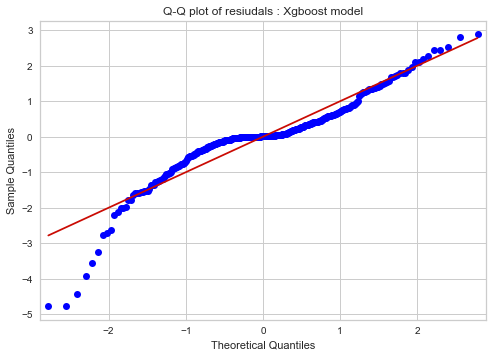

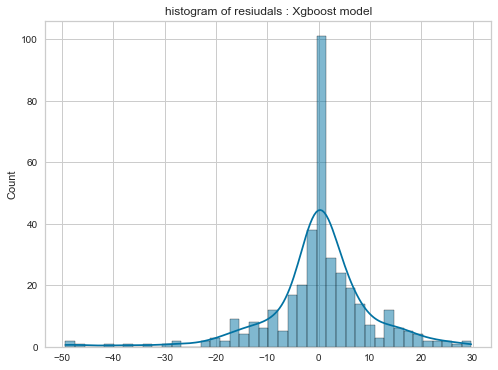

In [81]:
test_pred(pipeline_xg , 'Xgboost' )

----- lasso -------
       recommendation_percent  ...  predict_m20
count              368.000000  ...   368.000000
mean                84.361413  ...    61.813456
std                 13.664023  ...    15.420395
min                 25.000000  ...   -29.184333
25%                 78.000000  ...    60.405928
50%                 87.000000  ...    64.035084
75%                 93.250000  ...    68.670126
max                100.000000  ...    79.469596

[8 rows x 4 columns]


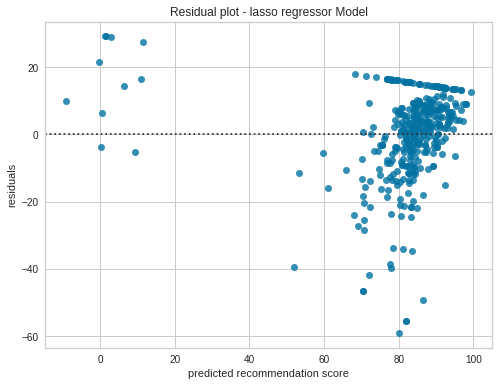

<Figure size 576x432 with 0 Axes>

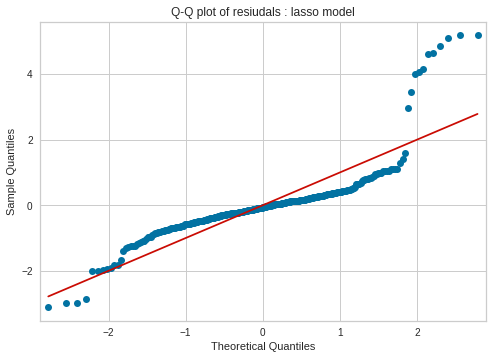

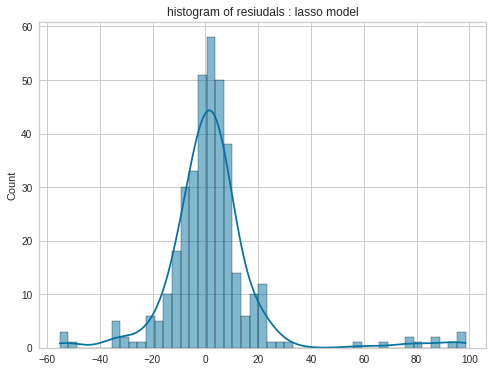

In [205]:
test_pred(pipeline_lasso , 'lasso' )

----- randomforest -------
       recommendation_percent  ...  predict_m20
count              368.000000  ...   368.000000
mean                84.361413  ...    64.919085
std                 13.664023  ...     4.046229
min                 25.000000  ...    45.337161
25%                 78.000000  ...    65.977527
50%                 87.000000  ...    66.113396
75%                 93.250000  ...    66.113396
max                100.000000  ...    66.113396

[8 rows x 4 columns]


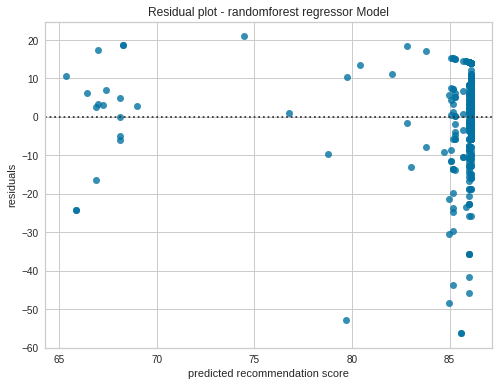

<Figure size 576x432 with 0 Axes>

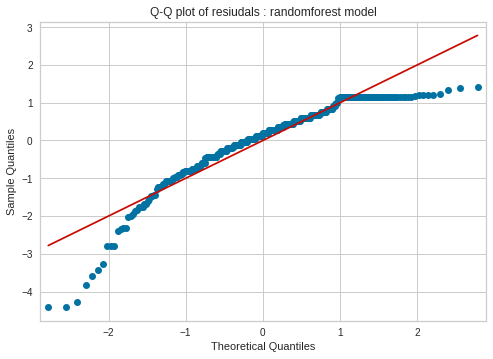

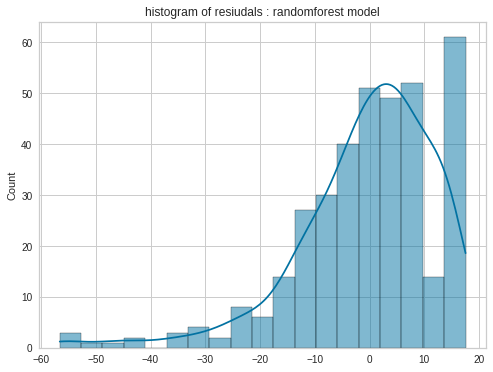

In [206]:
test_pred(pipeline_rf , 'randomforest' )

### pdp plots

In [83]:
X

,Price_per_unit,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Review_sentiment,Review_title_sentiment,Negative_sentiment_count,...,pros__value,pros__wood,cons__disappointing,cons__flavor,cons__mixing,cons__price,cons__smell,cons__taste,cons__thickness,cons__weight
0,36.99,146,9,18,17,47,55,0.361940,0.493618,10.0,...,0,0,0,0,0,0,0,0,0,0
1,18.99,471,7,7,24,72,361,0.463433,0.440534,5.0,...,0,0,0,0,0,0,0,0,0,0
2,15.99,436,22,20,21,73,300,0.396102,0.546345,14.0,...,0,0,0,0,0,0,0,0,0,0
3,194.90,772,11,9,36,101,615,0.370843,0.401717,13.0,...,0,0,0,0,0,0,0,0,0,0
4,35.99,1297,7,14,53,281,942,0.403735,0.453659,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,99.99,35,1,1,0,6,27,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1690,30.99,216,7,1,7,49,152,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1691,33.99,55,0,0,1,22,32,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1692,46.99,48,0,1,3,7,37,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import sklearn.inspection.partial_dependence as partial_dependence
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = XGBRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0,1,7], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

NameError: name 'plot_partial_dependence' is not defined

In [110]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

print("Computing partial dependence plots...")

features = ['Price_per_unit',  'Rating_count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count']
display = PartialDependenceDisplay.from_estimator(
    my_model,
    X,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
#print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)
display.figure_.subplots_adjust(hspace=0.3)

Computing partial dependence plots...


AttributeError: type object 'PartialDependenceDisplay' has no attribute 'from_estimator'

In [107]:
!pip install scikit-learn --upgrade

  Using cached scikit_learn-1.0.1-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [92]:
titanic_features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

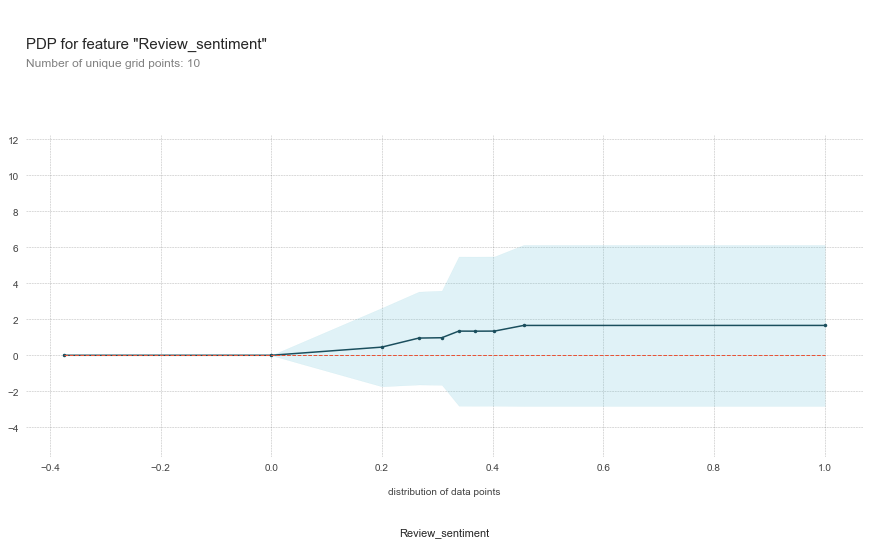

In [96]:
from pdpbox import pdp, get_dataset

pdp_fare = pdp.pdp_isolate(model=my_model,
                           dataset=X,
                           model_features=X.columns,
                           feature='Review_sentiment')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_fare,
                         feature_name='Review_sentiment',
                         plot_pts_dist=True)

### null data recommednation

In [207]:
df_recomm_null = df[df['recommendation_percent'].isna()]
df_recomm_null.head()

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Pros,Cons,recommendation_count,recommendation_percent,Final_sentiment,Review count,Review_sentiment,Review_title_sentiment,signed_Final_sentiment,Negative_sentiment_count,Positive_sentiment_count,Positive_Reviews,Negative_Reviews,review_combined,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,pros__comfort,pros__convenient,pros__copper,pros__delicious,pros__disappointing,pros__drinking,pros__drinks,pros__enjoyment,pros__flavor,pros__flavors,pros__for bottles,pros__for coffee,pros__for school use,pros__glass,pros__large,pros__lighting,pros__mixing,pros__packaging,pros__preparation,pros__price,pros__quality,pros__red,pros__satisfaction,pros__small,pros__smell,pros__smooth,pros__smoothness,pros__stability,pros__sweet,pros__taste,pros__value,pros__wood,cons__disappointing,cons__flavor,cons__mixing,cons__price,cons__smell,cons__taste,cons__thickness,cons__weight
49,Glenlivet Illicit Still 12 Year Single Malt Sc...,42.99,4.8,5,0,0,0,1,4,NaN,NaN,NaN,NaN,0.303960,5.0,0.277293,0.303960,1.0,0.0,5.0,Like it more than the Glenlivet 12 Years or Gl...,NaN,Like it more than the Glenlivet 12 Years or Gl...,0.013112,-0.069590,-0.056204,0.038505,-0.066941,0.063284,-0.040823,-0.015419,0.065397,-0.054890,-0.059374,0.060431,-0.028033,0.045443,-0.067312,0.069990,-0.068424,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,Bird Dog Strawberry Whiskey 750ml,17.99,4.8,4,0,0,0,1,3,NaN,NaN,NaN,NaN,1.000000,1.0,0.625000,1.000000,1.0,0.0,1.0,Smooth and tasty ! !,NaN,Smooth and tasty ! !,-0.032157,0.010330,-0.013976,0.073101,0.094633,0.044170,0.035722,0.016121,-0.031507,0.078342,-0.058699,-0.042145,-0.062654,-0.027469,-0.100576,0.013392,0.011177,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,Templeton Rye Whiskey 6 Year 750ml,39.99,4.6,15,0,1,1,1,12,NaN,NaN,NaN,NaN,0.482738,6.0,0.383559,0.478472,1.0,0.0,6.0,Templeton sources their rye from Lawrenceburg ...,NaN,Templeton sources their rye from Lawrenceburg ...,0.017980,-0.044688,-0.049819,0.005526,-0.058962,0.047702,-0.040678,-0.030788,0.065825,-0.050261,-0.042114,0.031005,-0.046490,0.011503,-0.068151,0.067845,-0.034579,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,Glyph 85H Whiskey 750ml,29.99,5.0,3,0,0,0,0,3,NaN,NaN,NaN,NaN,0.850000,2.0,0.825000,0.850000,1.0,0.0,2.0,Great taste! Lots of flavor I bought it for th...,NaN,Great taste! Lots of flavor I bought it for th...,-0.007822,-0.003227,-0.041667,-0.003108,-0.051963,0.051512,-0.009739,-0.016147,-0.036901,0.034311,-0.038930,-0.017457,-0.056444,-0.057447,-0.095597,0.080694,-0.086645,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,Bird Dog Peanut Butter Flavored Whiskey 750ml,17.99,5.0,2,0,0,0,0,2,NaN,NaN,NaN,NaN,0.500000,1.0,0.251531,0.500000,1.0,0.0,1.0,This is my first time trying bird dog and I’m ...,NaN,This is my first time trying bird dog and I’m ...,-0.033892,0.029734,-0.009655,-0.006042,-0.048465,0.048088,-0.062721,0.005163,0.088183,0.055640,-0.045189,0.007776,0.009476,0.060797,-0.092836,0.070747,0.016700,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
df_recomm_null.to_csv('df_recom_null.csv',index=False)

In [209]:
print(cols_x) 
X_null = df_recomm_null[cols_x]

['Price_per_unit', 'Rating_count', '1 star count', '2 star count', '3 star count', '4 star count', '5 star count', 'Review_sentiment', 'Review_title_sentiment', 'Negative_sentiment_count', 'Positive_sentiment_count', 'pros_count', 'cons_count', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123

In [210]:
X_null = X_null.fillna(0)

In [211]:
best_mean = -1e06
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_null)
  name = models_list[i]
  mean = np.mean(y_pred)
  print(name , "mean :" , np.mean(y_pred) , '|min : ' , min(y_pred) , "|max : " , max(y_pred)  )
  best_mean = max(best_mean , mean)
  if best_mean == mean:
    best_pipeline = pipelines[i]

Linear Regression mean : 0.8083835781758409 |min :  -70.44612733558202 |max :  85.63228525561927
KNN regression mean : 22.8727634194831 |min :  0.0 |max :  100.0
SVM regression mean : 64.18092324647739 |min :  54.358511846984115 |max :  90.34787167702075
XGboost regression mean : -0.03889446 |min :  -7.8914523 |max :  3.573406
Random forest regression mean : 0.2675503317727628 |min :  0.0 |max :  79.69685979562074
Ridge regression mean : 0.8806581402725481 |min :  -53.464021505980625 |max :  68.49189490427635
Lasso regression mean : 1.098593302558006 |min :  -15.922306260115931 |max :  58.247601135004935
Elasticnet regression mean : 22.685827580772084 |min :  -21.40741105374545 |max :  65.52878588013255


In [212]:
print(best_pipeline)
y_pred = best_pipeline.predict(X_null) 

Pipeline(memory=None,
         steps=[('preprocess3',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_regressor',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [213]:
y_pred = pd.DataFrame(y_pred , columns = ['recommendation_prediction'])
y_pred

,recommendation_prediction
0,66.392867
1,57.474598
2,71.780679
3,55.130029
4,58.505745
...,...
498,67.272233
499,67.426215
500,67.253832
501,67.256981


In [214]:
y_pred.describe()

,recommendation_prediction
count,503.000000
mean,64.180923
std,6.560052
min,54.358512
25%,58.516211
50%,63.013124
75%,67.254322
max,90.347872


In [215]:
y_pred.to_csv('recom_prediction.csv',index=False)

## with embeddings

In [ ]:
df = pd.read_csv('Modelling_data (1).csv') 
#df = pd.read_csv('Modelling_data (2).csv') 
df.head()

In [ ]:
cols_x = ['Price_per_unit',  'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count','5 star count',  
       'Review_sentiment', 'Review_title_sentiment', 
       'Negative_sentiment_count', 'Positive_sentiment_count',
       'pros_count', 'cons_count', ] + [str(i) for i in range(0,512)]
#print(cols_x)
X = df[cols_x]
y = df['recommendation_percent']

In [ ]:
## nans
X = X.fillna(0)
y = y.fillna(0)

In [ ]:
## spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= test_ratio,random_state=0)
X_train.head()

### Deciding Which regressor pipeline is best

In [ ]:
pipelines = [pipeline_LR , pipeline_KNN ,   pipeline_svm , pipeline_xg , pipeline_rf , pipeline_ridge , pipeline_lasso , pipeline_elastic ]
models_list = ['Linear Regression' , 'KNN regression' , 'SVM regression' , 'XGboost regression' , 
               'Random forest regression' , 'Ridge regression' , 'Lasso regression' , 'Elasticnet regression']

In [ ]:
best_accuracy = 0.0
best_pipeline = ""

In [ ]:
for pipe in pipelines:
  pipe.fit(X_train , y_train)

In [ ]:
for i , model in enumerate(pipelines):
  #y_pred = model.predict(X_test)
  #acc = r2_score(y_test , y_pred)
  acc = model.score(X_test,y_test)
  name = models_list[i]
  train_r2 = model.score(X_train , y_train)
  train_adj_r2 = ( ( 1-train_r2 ) * ( len(y_train) - 1 )) / ( len(y_train) - X_train.shape[1] - 1 )
  train_adj_r2 = 1 - train_adj_r2
  print(name , " Accuracy :" , acc , '| train_score : ' ,train_r2 , '| adjusted R2: ', train_adj_r2   )
  best_accuracy = max(best_accuracy , acc)
  if best_accuracy == acc :
    best_pipeline = name

In [ ]:
## Best classifier and accuracy
print(best_pipeline , " is best classifier with accuracy = " , best_accuracy)

In [ ]:
print(len(y_test) , X_test.shape[1])

In [ ]:
## other metrics
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test , y_pred) ## r2 score is same as model.score()
  adj_r2 =  ( ( 1-r2 ) * ( len(y_test) - 1 )) / ( len(y_test) - X_test.shape[1] - 1 )
  adj_r2 = 1 - adj_r2
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test , y_pred)
  name = models_list[i]
  print(name , "-> R2 :" , round(r2,3) , "|adjusted R2 :" , round(adj_r2,3) , "|RMSE :" , round(rmse,3) , "|MAE :" , round(mae,3))

### null data recommednation

In [ ]:
df_recomm_null = df[df['recommendation_percent'].isna()]
df_recomm_null.head()

In [ ]:
df_recomm_null.to_csv('df_recom_null.csv',index=False)

In [ ]:
print(cols_x)
X_null = df_recomm_null[cols_x]

In [ ]:
X_null = X_null.fillna(0)

In [ ]:
best_mean = -1e06
for i , model in enumerate(pipelines):
  y_pred = model.predict(X_null)
  name = models_list[i]
  mean = np.mean(y_pred)
  print(name , "mean :" , np.mean(y_pred) , '|min : ' , min(y_pred) , "|max : " , max(y_pred)  )
  best_mean = max(best_mean , mean)
  if best_mean == mean:
    best_pipeline = pipelines[i]

In [ ]:
print(best_pipeline)
y_pred = best_pipeline.predict(X_null) 

In [ ]:
y_pred = pd.DataFrame(y_pred , columns = ['recommendation_prediction'])
y_pred

In [ ]:
y_pred.describe()

In [ ]:
y_pred.to_csv('recom_prediction.csv',index=False)

##  Grid Search CV on all the models - single pipeline


In [ ]:
stop here

In [ ]:
## Initally just create a pipeline wtih any one model
pipe = Pipeline(steps = [ ('predictor' , linear_model.LinearRegression()) ])

In [ ]:

grid_param = [
                {"predictor": [KNeighborsRegressor(n_neighbors=2)],
                 "predictor__n_neighbors": [3,4,5,6,7,8],
                 },
                
                {"predictor": [svm.SVR()],
                 'predictor__C' : [1,10,100,1000] , 
                  'predictor__kernel' : ['linear'] # , 'rbf']
                 }

              ]

grid_param

In [ ]:
X_train

In [ ]:
#gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search

In [ ]:
## Grid search fit on train data   
best_model = gridsearch.fit(X_train,y_train)   # Takes around 10-15 mins cuz we have so many possiblites in above parametr grid


In [ ]:
## Best paramteres returned by Grid search CV
GS_accuracy = best_model.best_score_
print('Grid search accuracy : ',GS_accuracy)
Best_hyperparameters = best_model.best_params_
print( " best hyperparameters : " , Best_hyperparameters )
#print(" best pipeline : " ,best_model.best_estimator_)

In [ ]:
## Testing the best parameters (getting accuracy)
final_acc = best_model.score(X_test , y_test)
print( "Final Best model Accuracy :" , final_acc )

In [ ]:
## predictions
best_knn = Best_hyperparameters['predictor'].fit(X_train , y_train)
y_test = best_knn.predict(X_test)
y_test